## Dataset Links :

 - [256x256 pngs](https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-256-pngs)
 - [512x512 pngs](https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-512-pngs)
 - [768x768 pngs](https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-768-pngs)
 - [1024x1024 pngs](https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-1024-pngs)

**Changes :**
- Invert images with PhotometricInterpretation == "MONOCHROME1" 

## Initialization

In [1]:
!pip install -qU python-gdcm pydicom pylibjpeg

In [2]:
import os
import cv2
import glob
import gdcm
import pydicom
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from joblib import Parallel, delayed

In [3]:
train_images = glob.glob("/kaggle/input/rsna-breast-cancer-detection/train_images/*/*.dcm")

len(train_images)  # 54706

54706

## Examples

  0%|          | 0/3 [00:00<?, ?it/s]

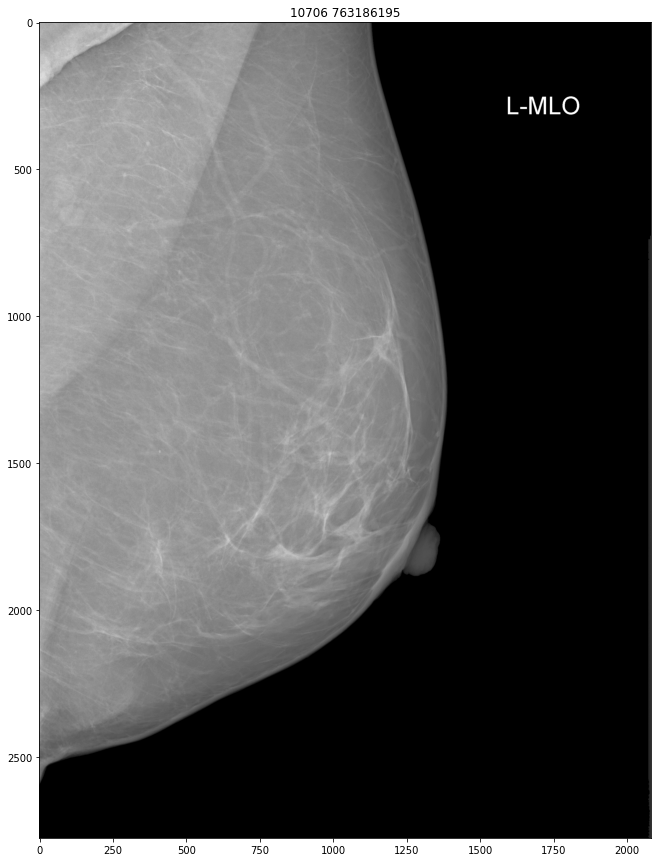

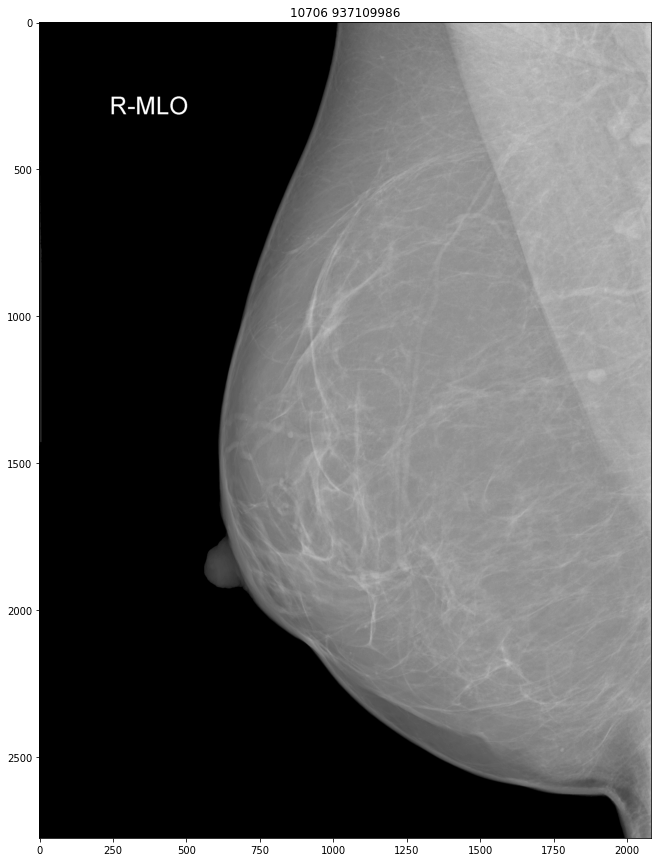

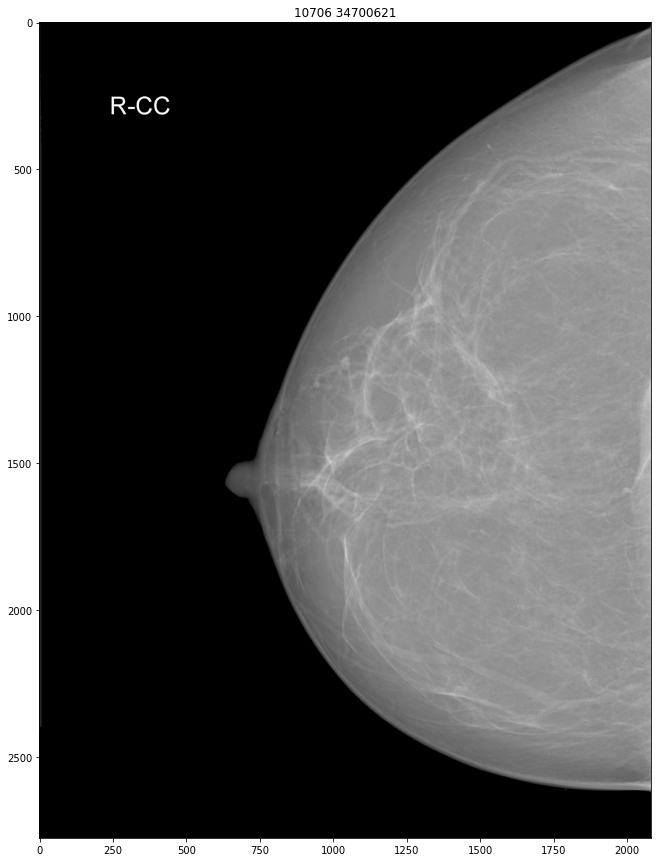

In [4]:
for f in tqdm(train_images[:3]):
    patient = f.split('/')[-2]
    image = f.split('/')[-1][:-4]

    dicom = pydicom.dcmread(f)
    img = dicom.pixel_array

    img = (img - img.min()) / (img.max() - img.min())

    if dicom.PhotometricInterpretation == "MONOCHROME1":
        img = 1 - img
        
    plt.figure(figsize=(15, 15))
    plt.imshow(img, cmap="gray")
    plt.title(f"{patient} {image}")
    plt.show()

## Save the processed data
**Images are quite big so resizing them is necessary.**
  - Use 256 to train your first models, or if you don't have a lot of compute
  - use 512 to have competitive models
  - Check if 768/1024 is better, if you have the compute power

**I advise using the `png` format because the jpg compression can be annoying during inference.**

In [5]:
SAVE_FOLDER = "output/"
SIZE = 512
EXTENSION = "png"

os.makedirs(SAVE_FOLDER, exist_ok=True)

In [6]:
def process(f, size=512, save_folder="", extension="png"):
    patient = f.split('/')[-2]
    image = f.split('/')[-1][:-4]

    dicom = pydicom.dcmread(f)
    img = dicom.pixel_array

    img = (img - img.min()) / (img.max() - img.min())

    if dicom.PhotometricInterpretation == "MONOCHROME1":
        img = 1 - img

    img = cv2.resize(img, (size, size))

    cv2.imwrite(save_folder + f"{patient}_{image}.{extension}", (img * 255).astype(np.uint8))

In [7]:
_ = Parallel(n_jobs=4)(
    delayed(process)(uid, size=SIZE, save_folder=SAVE_FOLDER, extension=EXTENSION)
    for uid in tqdm(train_images[:10])
)

  0%|          | 0/10 [00:00<?, ?it/s]

Done !